<a href="https://colab.research.google.com/github/kk0mtl/computer-vision/blob/mlp-learning/MLP_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
mnist_train = dset.MNIST("", train=True, transform=transforms.ToTensor(),
                         target_transform=None, download=True)
mnist_test = dset.MNIST("", train=False, transform=transforms.ToTensor(),
                         target_transform=None, download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5516645.22it/s] 


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 152684.03it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1496042.74it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5599802.69it/s]


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



mnist_train 길이:  60000
mnist_test 길이:  10000
image data 형태 :  torch.Size([1, 28, 28])
label :  5


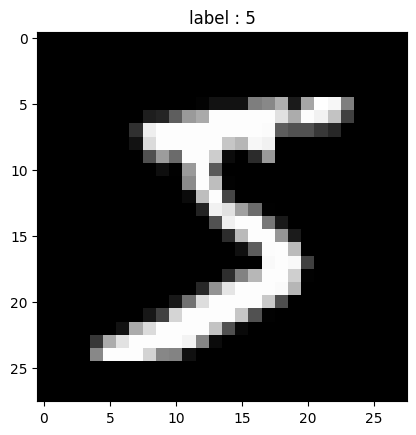

In [3]:
print("mnist_train 길이: ", len(mnist_train))
print("mnist_test 길이: ", len(mnist_test))

image, label = mnist_train.__getitem__(0)
print("image data 형태 : ", image.size())
print("label : ", label)

img = image.numpy()
plt.title("label : %d" % label)
plt.imshow(img[0], cmap="gray")
plt.show()

In [4]:
# hyper parameters
batch_size = 1024
learning_rate = 0.01
num_epoch = 400

In [5]:
train_loader = torch.utils.data.DataLoader(mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True, num_workers=2,
                                          drop_last=True)

# 검증을 위해 suffle=False
test_loader = torch.utils.data.DataLoader(mnist_test,
                                          batch_size=batch_size,
                                          shuffle=False, num_workers=2,
                                          drop_last=True)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[0]
한 번에 로드되는 데이터 크기 :  1024
(28, 28)
(28, 28)
(28, 28)


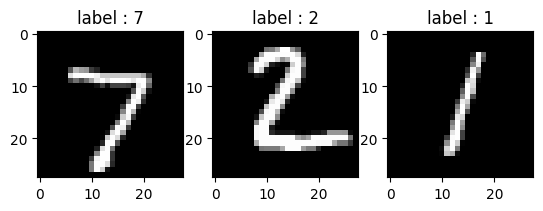

[1]
한 번에 로드되는 데이터 크기 :  1024
(28, 28)
(28, 28)
(28, 28)


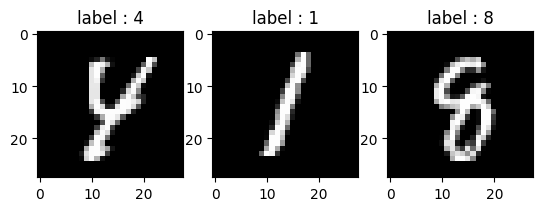

[2]
한 번에 로드되는 데이터 크기 :  1024
(28, 28)
(28, 28)
(28, 28)


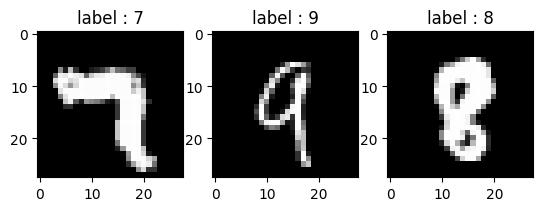

[3]
한 번에 로드되는 데이터 크기 :  1024
(28, 28)
(28, 28)
(28, 28)


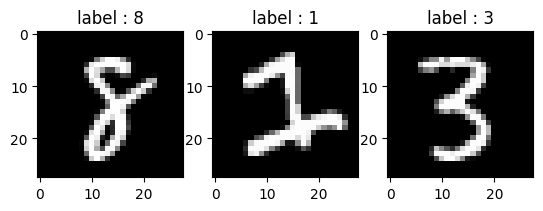

[4]
한 번에 로드되는 데이터 크기 :  1024
(28, 28)
(28, 28)
(28, 28)


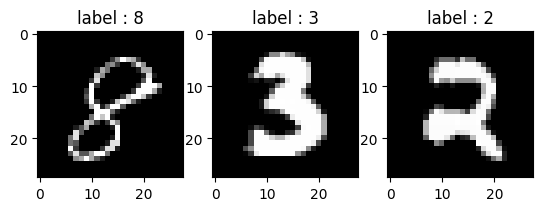

[5]
한 번에 로드되는 데이터 크기 :  1024
(28, 28)
(28, 28)
(28, 28)


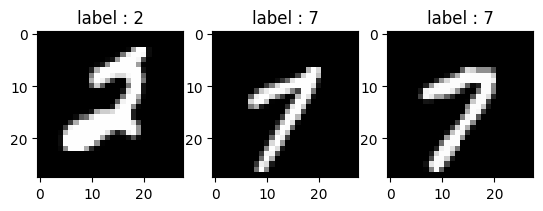

In [6]:
n = 3
for i, [imgs, labels] in enumerate(test_loader):
  if i>5:
    break

  print("[%d]"% i)
  print("한 번에 로드되는 데이터 크기 : " , len(imgs))

  for j in range(n):
    img = imgs[j].numpy()
    img = img.reshape((img.shape[1], img.shape[2]))
    print(img.shape)

    plt.subplot(1, n, j + 1)
    plt.imshow(img,cmap="gray")
    plt.title("label : %d" % labels[j])
  plt.show()

In [7]:
# 모델 선언
# 퍼셉트론(2 hidden layers)
# 유닛의 개수 : 784 -> 256 -> 128 -> 10
model = nn.Sequential(
    nn.Linear(28*28,256),   # Fully Connected Layer
    nn.Sigmoid(),           # activation function
    nn.Linear(256,128),
    nn.Linear(128,10),
)

# 파라미터 출력
# 784 * 256 + 256(bias)
# 256 * 128 + 128(bias)
# 128 * 10 + 10(bias)
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0142,  0.0188, -0.0264,  ..., -0.0279,  0.0214,  0.0137],
        [ 0.0020, -0.0311, -0.0236,  ..., -0.0064, -0.0092,  0.0230],
        [ 0.0048,  0.0273,  0.0009,  ...,  0.0292, -0.0228,  0.0120],
        ...,
        [-0.0240,  0.0313,  0.0114,  ...,  0.0105, -0.0046, -0.0210],
        [-0.0018, -0.0275,  0.0104,  ..., -0.0308, -0.0144,  0.0032],
        [-0.0037,  0.0070,  0.0274,  ..., -0.0260, -0.0346, -0.0184]],
       requires_grad=True), Parameter containing:
tensor([-0.0262,  0.0054,  0.0228,  0.0205, -0.0163,  0.0225, -0.0266,  0.0052,
        -0.0185, -0.0208, -0.0236, -0.0135, -0.0217, -0.0131,  0.0135, -0.0320,
         0.0300,  0.0026, -0.0032,  0.0071, -0.0108, -0.0262,  0.0087, -0.0268,
         0.0325,  0.0153,  0.0267, -0.0315, -0.0140, -0.0102,  0.0349, -0.0026,
        -0.0019, -0.0160, -0.0002,  0.0319, -0.0064,  0.0156, -0.0049,  0.0052,
         0.0020, -0.0335, -0.0327,  0.0173, -0.0207, -0.0117, -0.0232,  0.0025,
        -0.03

In [8]:
# GPU로 구현
# model = model.cuda()

In [9]:
def ComputeAccr(dloader, imodel):
  correct = 0
  total = 0

  for j, [imgs, labels] in enumerate(dloader):
    img = imgs
    label = Variable(labels)
    # label = Variable(labels).cuda()

    #(batch_size, 1, 28, 28) => (batch_size, 28, 28)
    img = img.reshape((img.shape[0], img.shape[2], img.shape[3]))
    #(batch_size, 28, 28) => (batch_size, 28 * 28)
    img = img.reshape((img.shape[0], img.shape[1] * img.shape[2]))
    img = Variable(img, requires_grad=False)  #requires_grad : gradient 연산을 수행할 것인가
    # img = Variable(img, requires_grad=False).cuda()

    # img.shape -> (1024, 784)

    # output_index(y_hat)와 결과만 비교 (BP가 필요없음)
    output = imodel(img)  # FP
    _, output_index = torch.max(output, 1)

    # output.shape -> (1024, 10)

    total += label.size(0)  # 데이터 개수
    correct += (output_index == label).sum().float()
  print("Accuracy of Test Data : {}".format(100*correct/total)) # % 연산

In [10]:
# 학습을 시키지 않았을 때 (label 개수 : 10개 => 1/10 확률)
ComputeAccr(test_loader, model)

Accuracy of Test Data : 10.08029556274414


In [11]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [12]:
num_epoch = 400
for i in range(num_epoch):
  for j, [imgs, labels] in enumerate(train_loader):
    img = imgs
    label = Variable(labels)

    img = img.reshape((img.shape[0], img.shape[2], img.shape[3]))
    img = img.reshape((img.shape[0], img.shape[1] * img.shape[2]))
    img = Variable(img, requires_grad=True)
    #img = Variable(img, requires_grad=True).cuda()

    optimizer.zero_grad()
    output = model(img)   # FP
    loss = loss_func(output, label)

    loss.backward()   # BP
    optimizer.step()  # w 갱신

  if i % 50 == 0:
    print("%d . ." % i)
    ComputeAccr(test_loader, model)
    print(loss)

0 . .
Accuracy of Test Data : 11.295573234558105
tensor(2.2947, grad_fn=<NllLossBackward0>)
50 . .
Accuracy of Test Data : 80.97872924804688
tensor(0.6861, grad_fn=<NllLossBackward0>)
100 . .
Accuracy of Test Data : 88.17274475097656
tensor(0.4348, grad_fn=<NllLossBackward0>)
150 . .
Accuracy of Test Data : 89.60503387451172
tensor(0.3838, grad_fn=<NllLossBackward0>)
200 . .
Accuracy of Test Data : 90.52734375
tensor(0.3281, grad_fn=<NllLossBackward0>)
250 . .
Accuracy of Test Data : 91.17838287353516
tensor(0.2584, grad_fn=<NllLossBackward0>)
300 . .
Accuracy of Test Data : 91.50390625
tensor(0.2990, grad_fn=<NllLossBackward0>)
350 . .
Accuracy of Test Data : 91.81857299804688
tensor(0.2547, grad_fn=<NllLossBackward0>)


In [13]:
ComputeAccr(test_loader, model)

Accuracy of Test Data : 92.00303649902344


In [15]:
netname = './nets/mip_weight.pkl'
torch.save(model, netname,)